**Name** : Bodhisatya Ghosh \
**Class** : CSE DS \
**UID** : 2021700026 \
**Subject** : ML \
**Experiment number** : 3

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

### Data importing and cleaning

In [71]:
data = pd.read_csv('./data.csv')
data.drop(columns=['Unnamed: 0','S.No','USERNAME','Caption'], inplace=True)
data.head(1)

,Followers,Hashtags,Time since posted,Likes
0,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139


In [72]:
data['Hashtags'] = data['Hashtags'].str.count('#')

In [73]:
data['Time since posted'] = data['Time since posted'].str.replace(' hours','').astype('float')
data.head(5)

,Followers,Hashtags,Time since posted,Likes
0,1600,5,11.0,139
1,880,28,2.0,23
2,255,30,2.0,25
3,340,30,3.0,49
4,304,26,3.0,30


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Followers          100 non-null    int64  
 1   Hashtags           100 non-null    int64  
 2   Time since posted  100 non-null    float64
 3   Likes              100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


### Data analysis

(<Axes: >,
                    Followers  Hashtags  Time since posted     Likes
 Followers           1.000000 -0.051553           0.251154  0.266218
 Hashtags           -0.051553  1.000000          -0.050210 -0.083375
 Time since posted   0.251154 -0.050210           1.000000  0.609888
 Likes               0.266218 -0.083375           0.609888  1.000000)

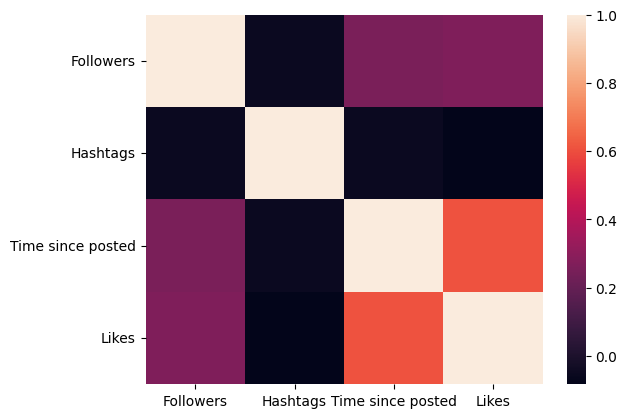

In [75]:
sns.heatmap(data.corr()), data.corr()

### Data splitting and scaling

In [76]:
scale = StandardScaler()

In [77]:
x = scale.fit_transform(data[['Time since posted','Followers']])
y = data['Likes']

In [78]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=500, test_size=0.2)

### Model training

In [79]:
model = LinearRegression()

In [80]:
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

### Metrics

R2 score is: -0.006552883676926635
MSE is: 695.276404399837


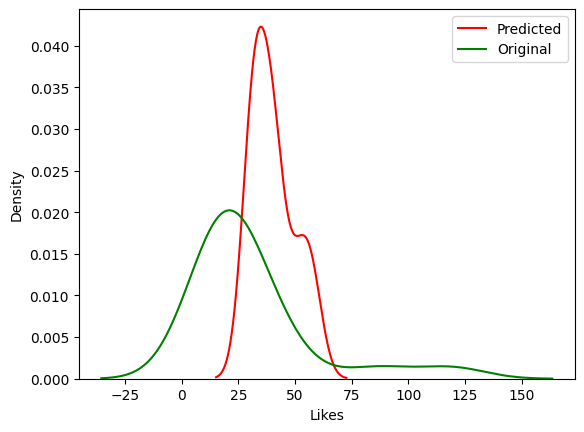

In [81]:
ax = sns.kdeplot(ypred,color='red',label='Predicted')
sns.kdeplot(ytest,color='green',label='Original',ax=ax)
plt.legend()

print("R2 score is: {}".format(r2_score(ytest,ypred)))
print("MSE is: {}".format(mean_squared_error(ytest,ypred)))